In [1]:
import train_sb3 as train
import numpy as np
from hem.env.utils import Renderer
import evaluate_tools as et

from hem.HEM_v0 import parallel_env, sa_env, gym_env
from hem.HEM_v1 import sa_stack_env
from stable_baselines3 import SAC, PPO, DDPG

/Users/duxiao/Documents/workspace/HEM/hem/env/../../checkpoint/base_load_pre/20250327-232617/


In [2]:
env_cl = gym_env
model = SAC

experiment_name = input('Experiment name: ')
checkpoint_path_dict = train.checkpoint_path(experiment_name, 0, 0)

model = et.load_best_model(checkpoint_path_dict, sb3_model=model)
env = et.load_test_env(checkpoint_path_dict, env_cl=env_cl, num_episodes_in_one_test=1, train_mode=False,
                       noise_strength=0)
train_env_kwargs = np.load(checkpoint_path_dict['env_set_path'], allow_pickle=True)['train_env_kwargs']
print(env.metadata)

Load best model from ./checkpoint/AMT-OC_20250405-104521/iteration_0/sample_0
Make env: mode: test, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
Make env: mode: test, whole_days: 122, train_days: 106, val_days: 16, test_days: 16
{'name': 'RawGymEnv_for_HEM', 'multi_agent': False}


In [3]:
print(model.policy)

SACPolicy(
  (actor): Actor(
    (features_extractor): FeaturesExtractor(
      (features_extractor): Sequential(
        (0): LayerNorm((180,), eps=1e-05, elementwise_affine=True)
        (1): Linear(in_features=180, out_features=256, bias=True)
        (2): ReLU()
      )
    )
    (latent_pi): Sequential(
      (0): Linear(in_features=256, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=512, bias=True)
      (3): ReLU()
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): ReLU()
      (6): Linear(in_features=128, out_features=32, bias=True)
      (7): ReLU()
      (8): Linear(in_features=32, out_features=128, bias=True)
      (9): ReLU()
      (10): Linear(in_features=128, out_features=512, bias=True)
      (11): ReLU()
      (12): Linear(in_features=512, out_features=256, bias=True)
      (13): ReLU()
    )
    (mu): Linear(in_features=256, out_features=16, bias=True)
    (log_std): Linear(in_features=256, out_fea

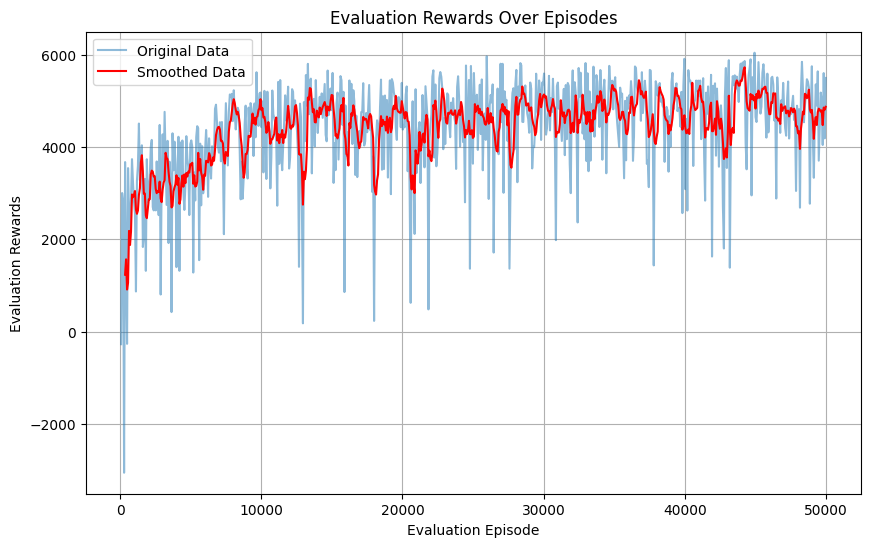

In [4]:
et.plot_log(checkpoint_path_dict['log_path'] + '/evaluations.npz', checkpoint_path_dict['env_set_path'])

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (0, 287)
KPIs:
electrical_consumption_sum: 11.4701
electrical_cost_sum: 55.2188
discomfort_proportion: 0.0000
discomfort_cold_proportion: 0.0000
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 11.4701 / 21.7369, 0.4723
BESS_electrical_cost_contribution: 55.2188 / 84.8155, 0.3490
AC_control: 64 / 288, 0.2222
BESS_control: 154 / 288, 0.5347
washer_control: 11 / 288, 0.0382
AC_reward: -125.2823
BESS_reward: 4062.6503
washer_reward: 1483.1052
washer_delayed_duration: 5.0
base_load_pre_mse: 0.0005


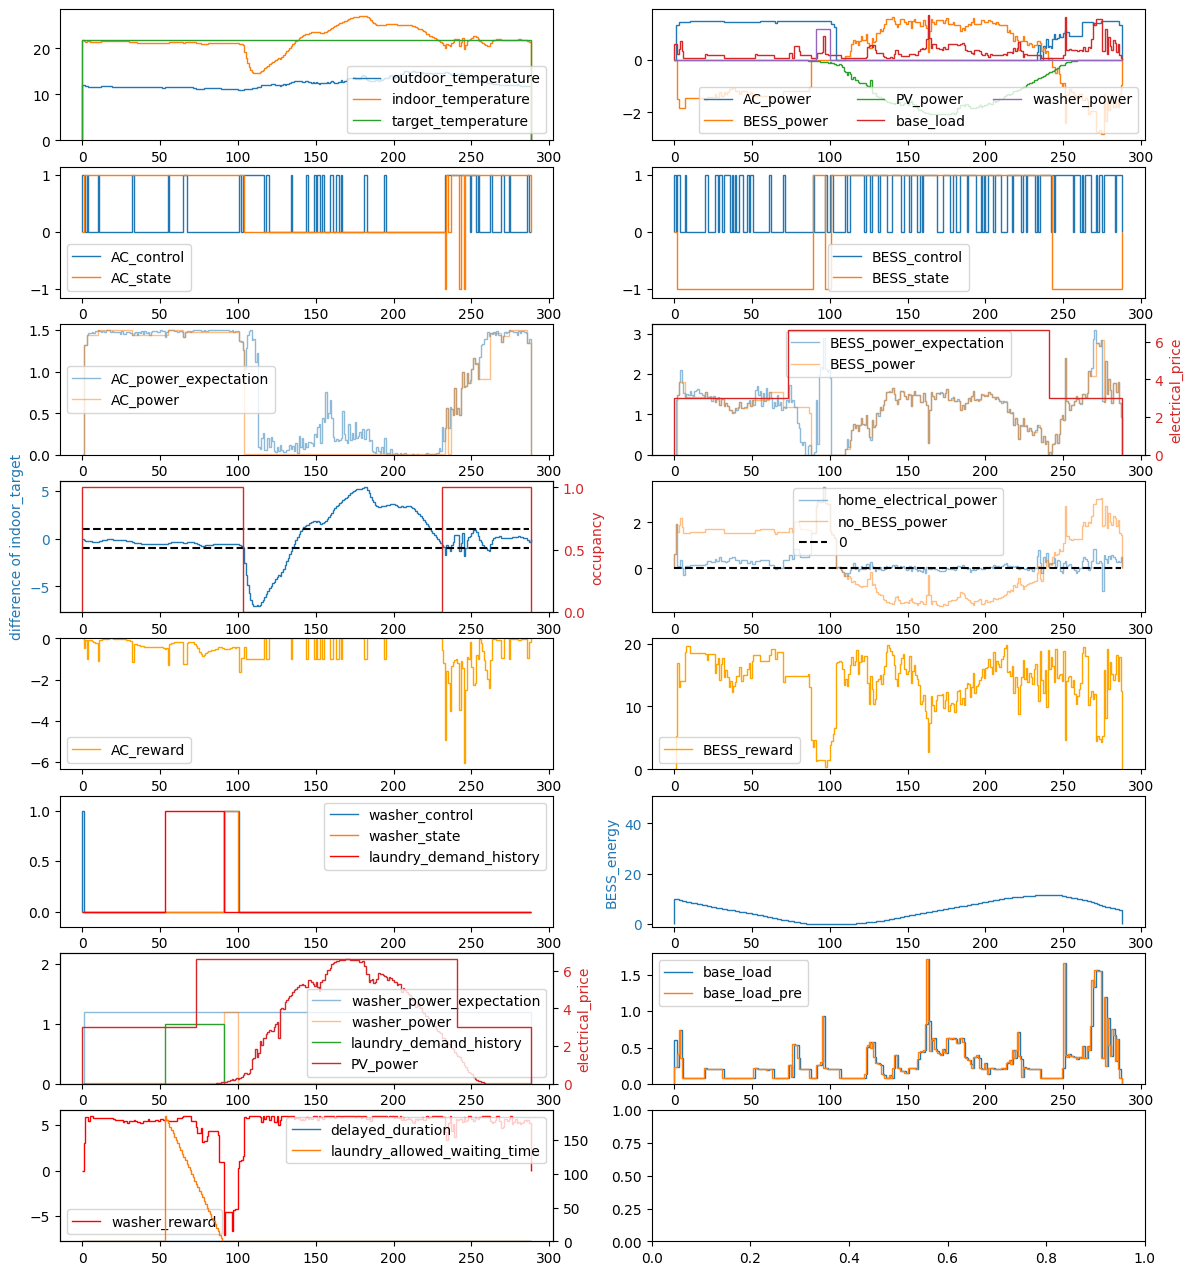

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (288, 575)
KPIs:
electrical_consumption_sum: 9.0692
electrical_cost_sum: 49.6582
discomfort_proportion: 0.0060
discomfort_cold_proportion: 0.0060
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 9.0692 / 19.9091, 0.5445
BESS_electrical_cost_contribution: 49.6582 / 76.5921, 0.3517
AC_control: 38 / 288, 0.1319
BESS_control: 156 / 288, 0.5417
washer_control: 11 / 288, 0.0382
AC_reward: -220.5718
BESS_reward: 4476.8701
washer_reward: 1414.7672
washer_delayed_duration: 1.0000000000002274
base_load_pre_mse: 0.0002


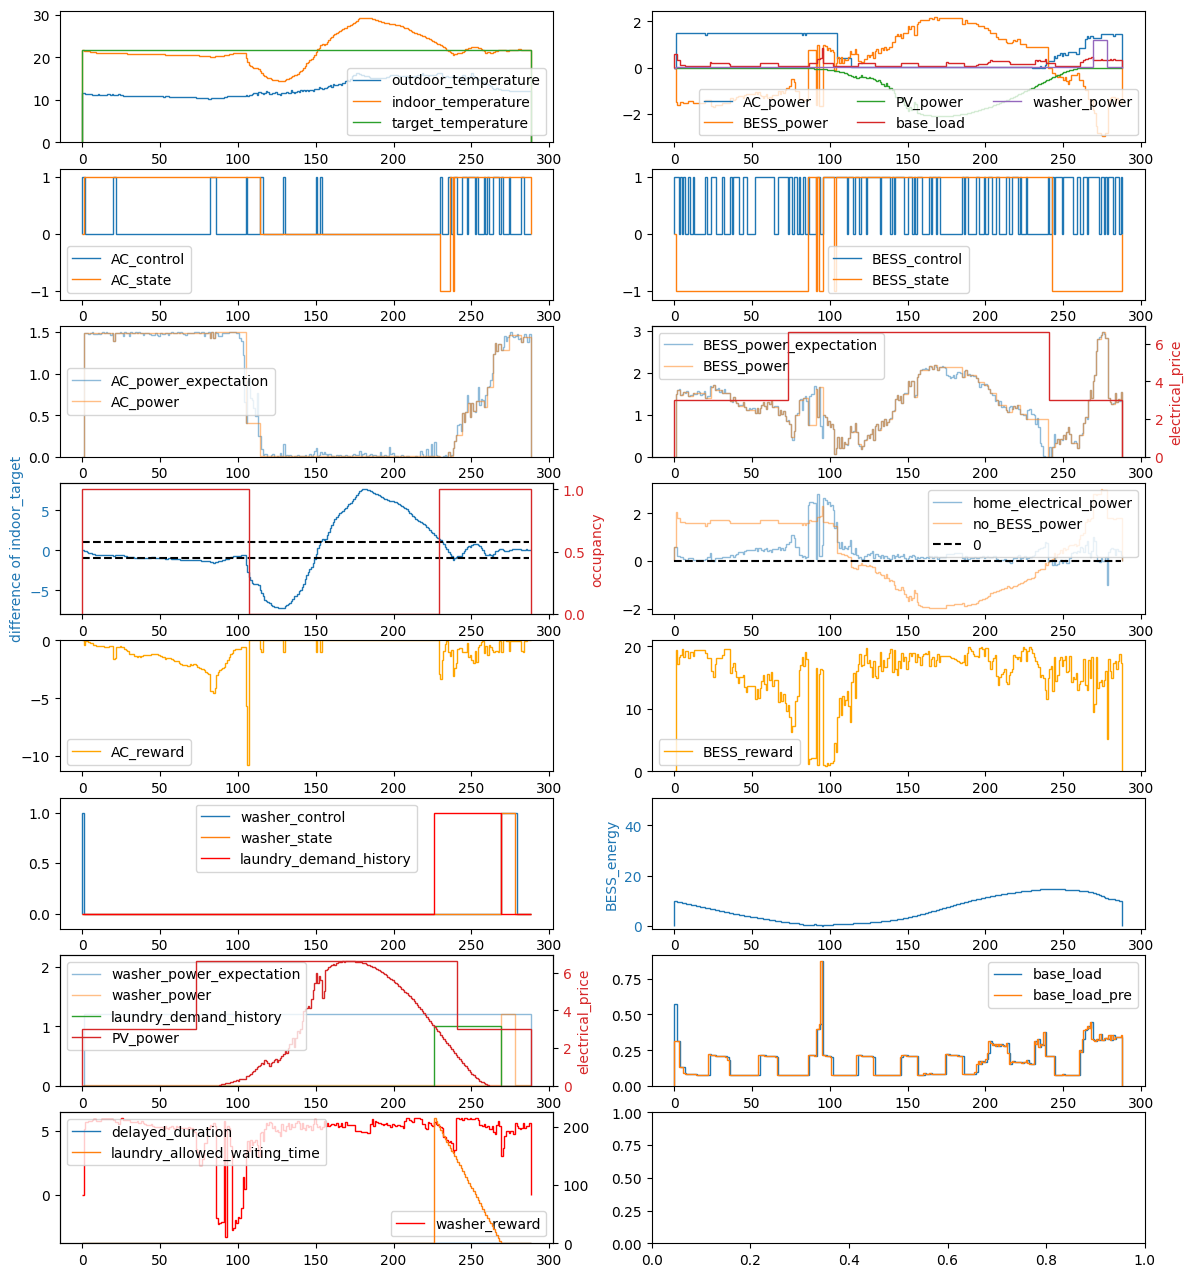

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (576, 863)
KPIs:
electrical_consumption_sum: 30.6198
electrical_cost_sum: 155.5074
discomfort_proportion: 0.0299
discomfort_cold_proportion: 0.0299
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 30.6198 / 32.7108, 0.0639
BESS_electrical_cost_contribution: 155.5074 / 140.2110, -0.1091
AC_control: 67 / 288, 0.2326
BESS_control: 175 / 288, 0.6076
washer_control: 11 / 288, 0.0382
AC_reward: -505.2625
BESS_reward: 3325.2463
washer_reward: 1017.9086
washer_delayed_duration: 3.0000000000001137
base_load_pre_mse: 0.0003


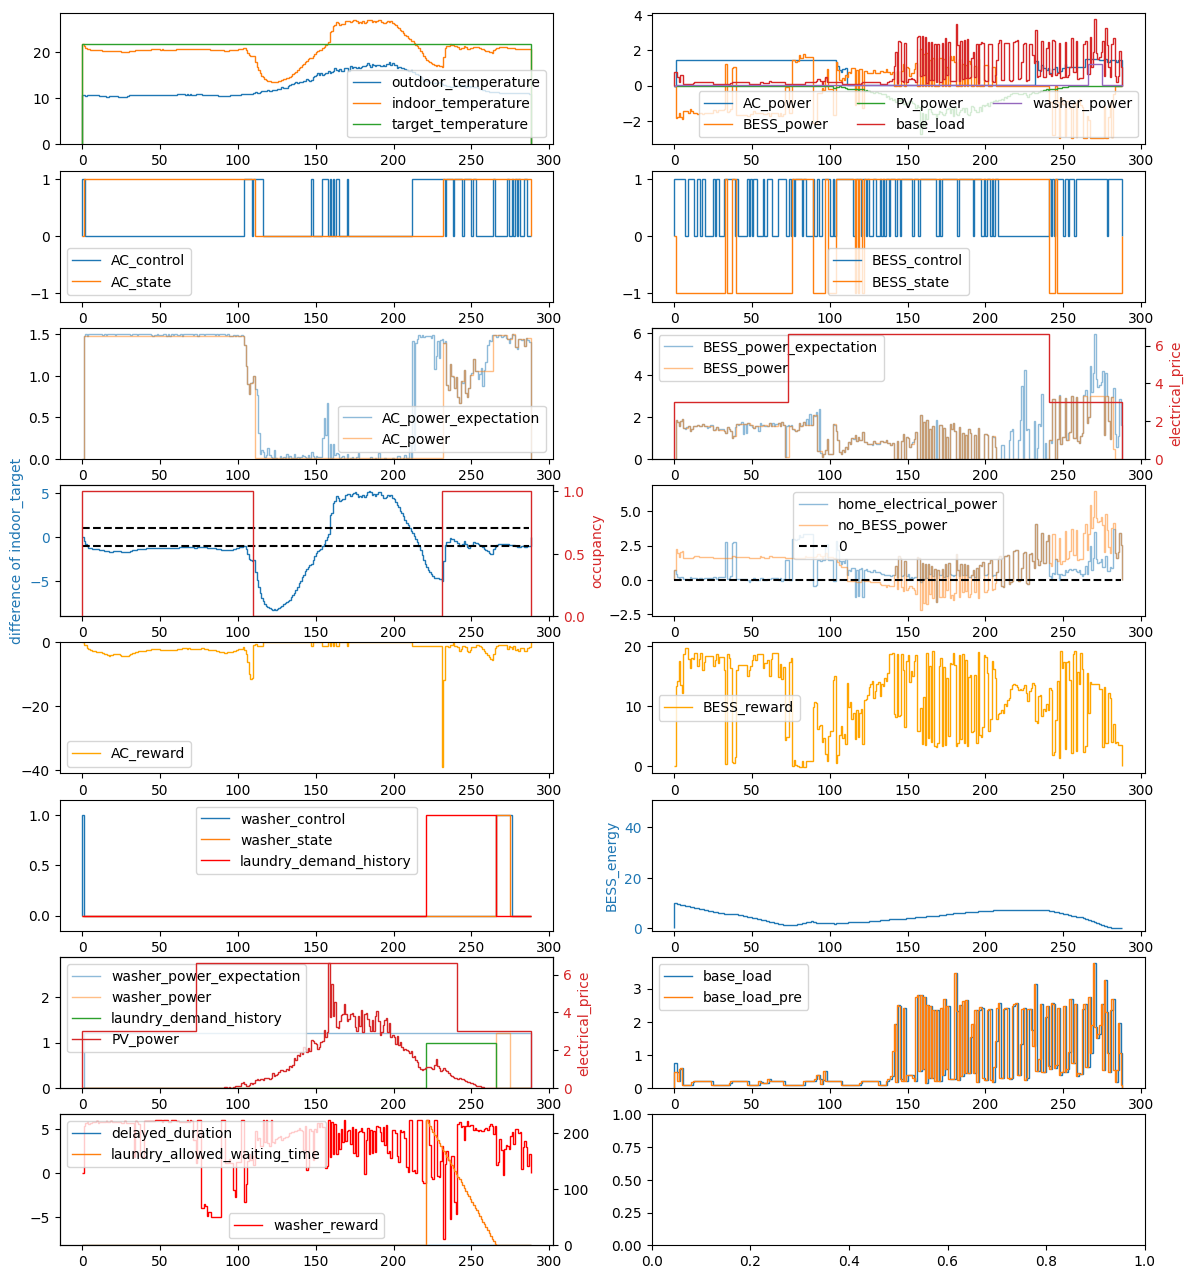

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (864, 1151)
KPIs:
electrical_consumption_sum: 9.5771
electrical_cost_sum: 46.1709
discomfort_proportion: 0.0412
discomfort_cold_proportion: 0.0294
discomfort_hot_proportion: 0.0118
BESS_electrical_consumption_contribution: 9.5771 / 20.8552, 0.5408
BESS_electrical_cost_contribution: 46.1709 / 77.8510, 0.4069
AC_control: 31 / 288, 0.1076
BESS_control: 142 / 288, 0.4931
washer_control: 11 / 288, 0.0382
AC_reward: -326.4496
BESS_reward: 4438.5503
washer_reward: 1477.1406
washer_delayed_duration: 1.0000000000002274
base_load_pre_mse: 0.0001


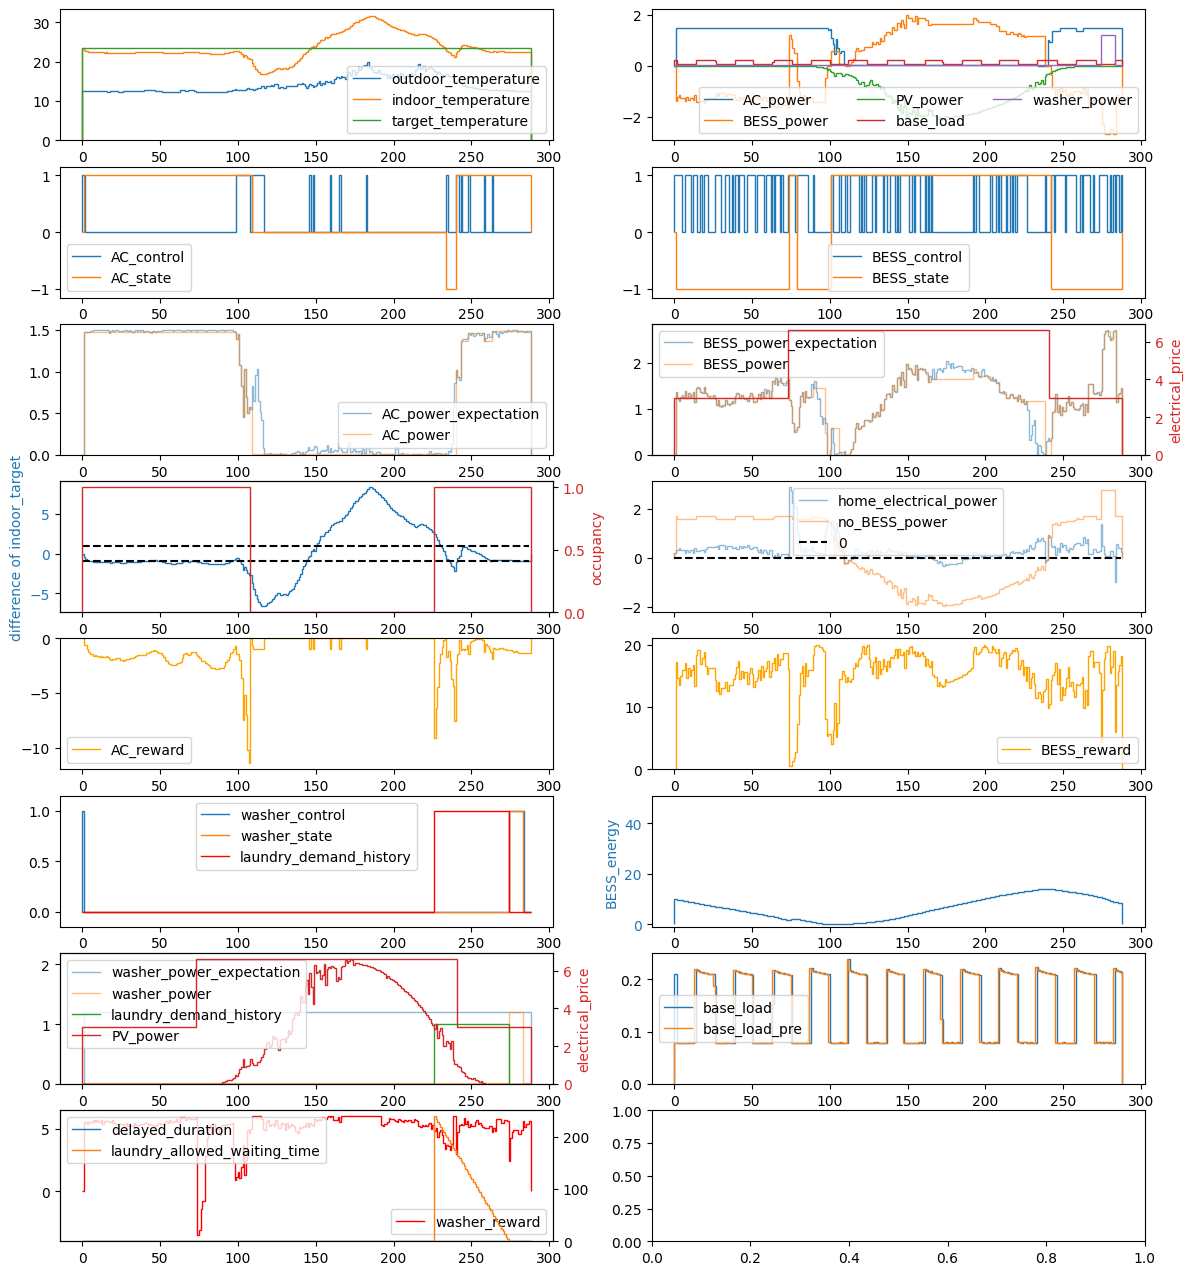

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (1152, 1439)
KPIs:
electrical_consumption_sum: 12.3788
electrical_cost_sum: 61.0227
discomfort_proportion: 0.0337
discomfort_cold_proportion: 0.0337
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 12.3788 / 19.6763, 0.3709
BESS_electrical_cost_contribution: 61.0227 / 75.1111, 0.1876
AC_control: 93 / 288, 0.3229
BESS_control: 183 / 288, 0.6354
washer_control: 10 / 288, 0.0347
AC_reward: -329.0257
BESS_reward: 4481.8002
washer_reward: 1451.8160
washer_delayed_duration: 2.0000000000004547
base_load_pre_mse: 0.0000


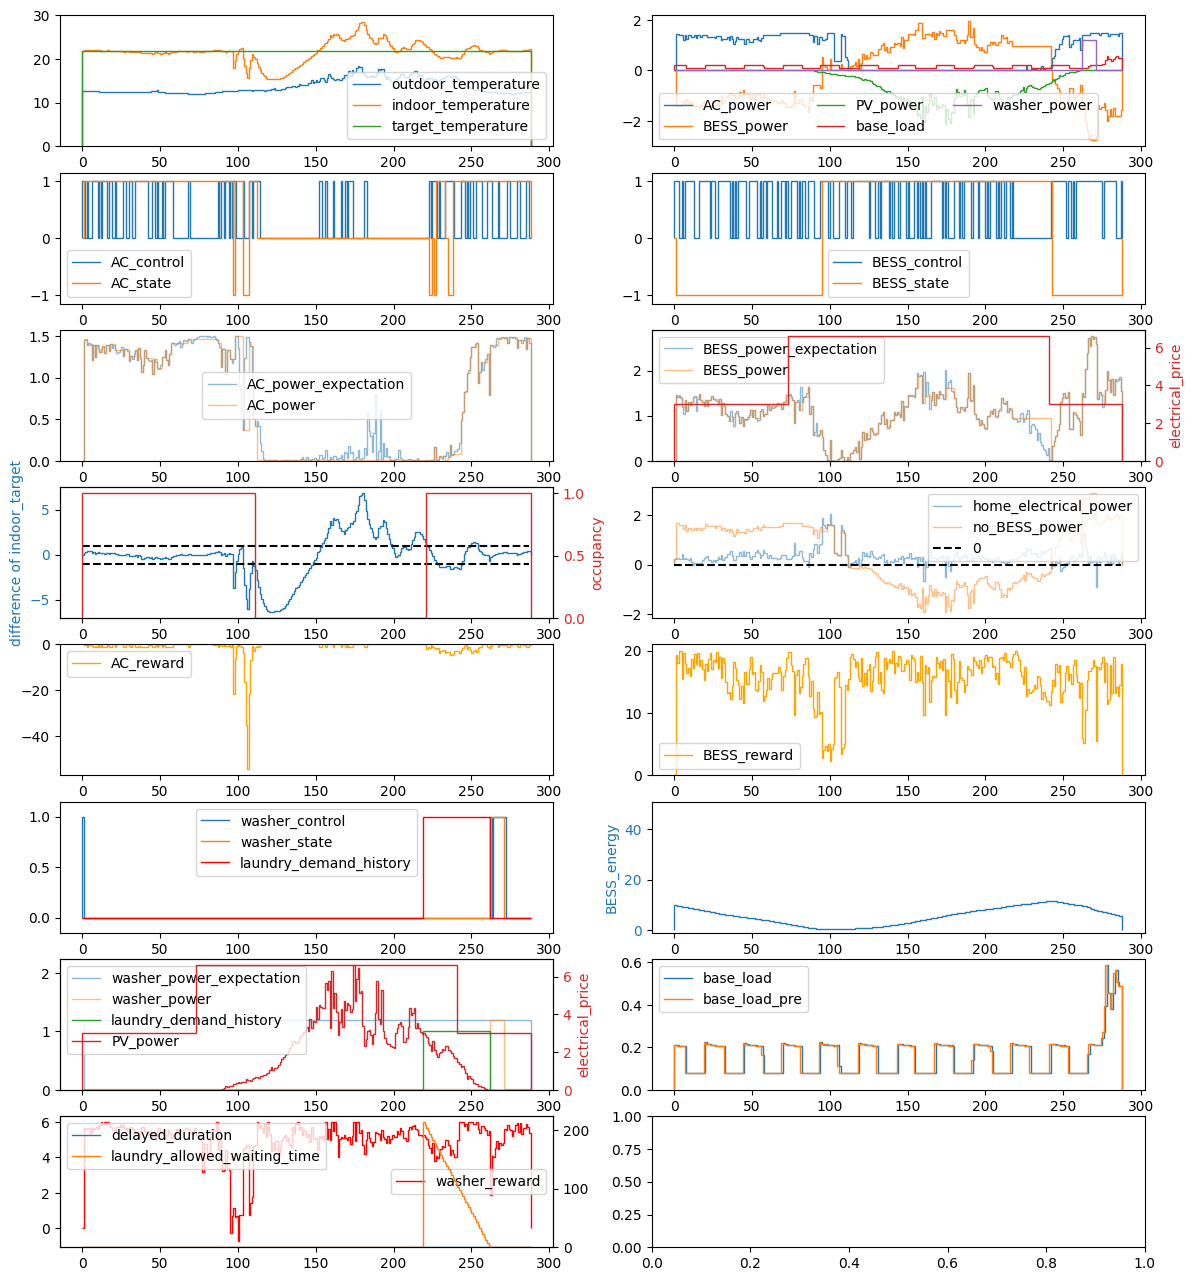

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (1440, 1727)
KPIs:
electrical_consumption_sum: 11.4531
electrical_cost_sum: 55.3734
discomfort_proportion: 0.0069
discomfort_cold_proportion: 0.0000
discomfort_hot_proportion: 0.0069
BESS_electrical_consumption_contribution: 11.4531 / 10.9747, -0.0436
BESS_electrical_cost_contribution: 55.3734 / 46.4056, -0.1932
AC_control: 172 / 288, 0.5972
BESS_control: 134 / 288, 0.4653
washer_control: 11 / 288, 0.0382
AC_reward: -353.1101
BESS_reward: 4378.3941
washer_reward: 1473.2664
washer_delayed_duration: 5.0
base_load_pre_mse: 0.0000


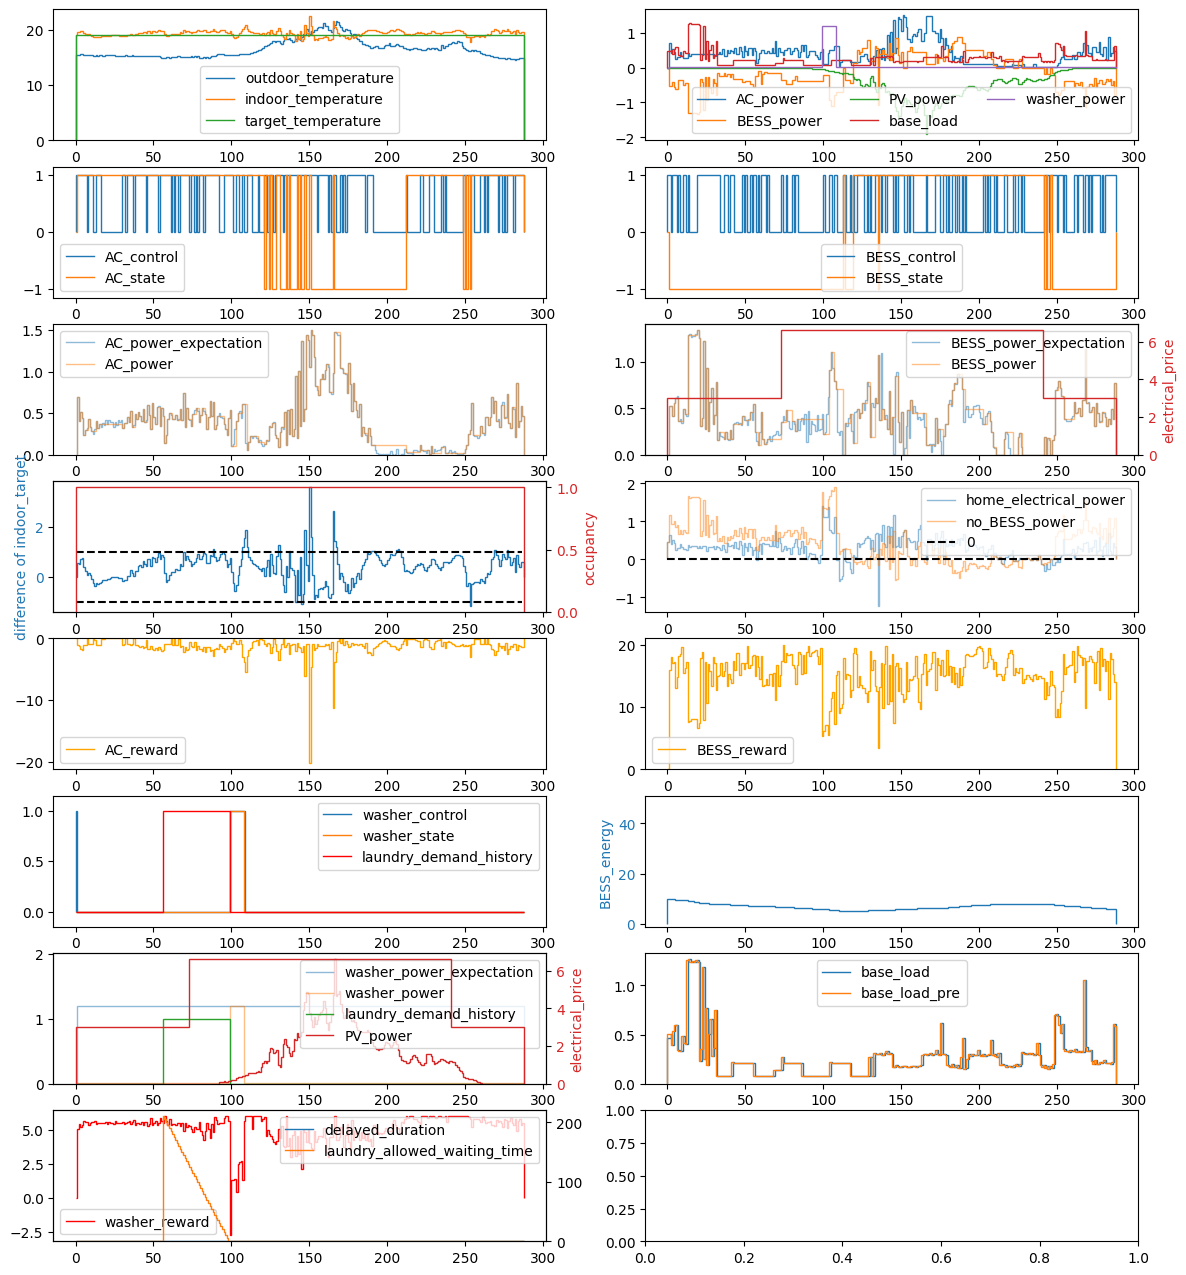

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (1728, 2015)
KPIs:
electrical_consumption_sum: 15.5086
electrical_cost_sum: 70.6836
discomfort_proportion: 0.0714
discomfort_cold_proportion: 0.0000
discomfort_hot_proportion: 0.0714
BESS_electrical_consumption_contribution: 15.5086 / 19.4440, 0.2024
BESS_electrical_cost_contribution: 70.6836 / 80.1985, 0.1186
AC_control: 128 / 288, 0.4444
BESS_control: 111 / 288, 0.3854
washer_control: 1 / 288, 0.0035
AC_reward: -337.7366
BESS_reward: 3577.1586
washer_reward: 287.2992
washer_delayed_duration: 94770.0000000002
base_load_pre_mse: 0.0000


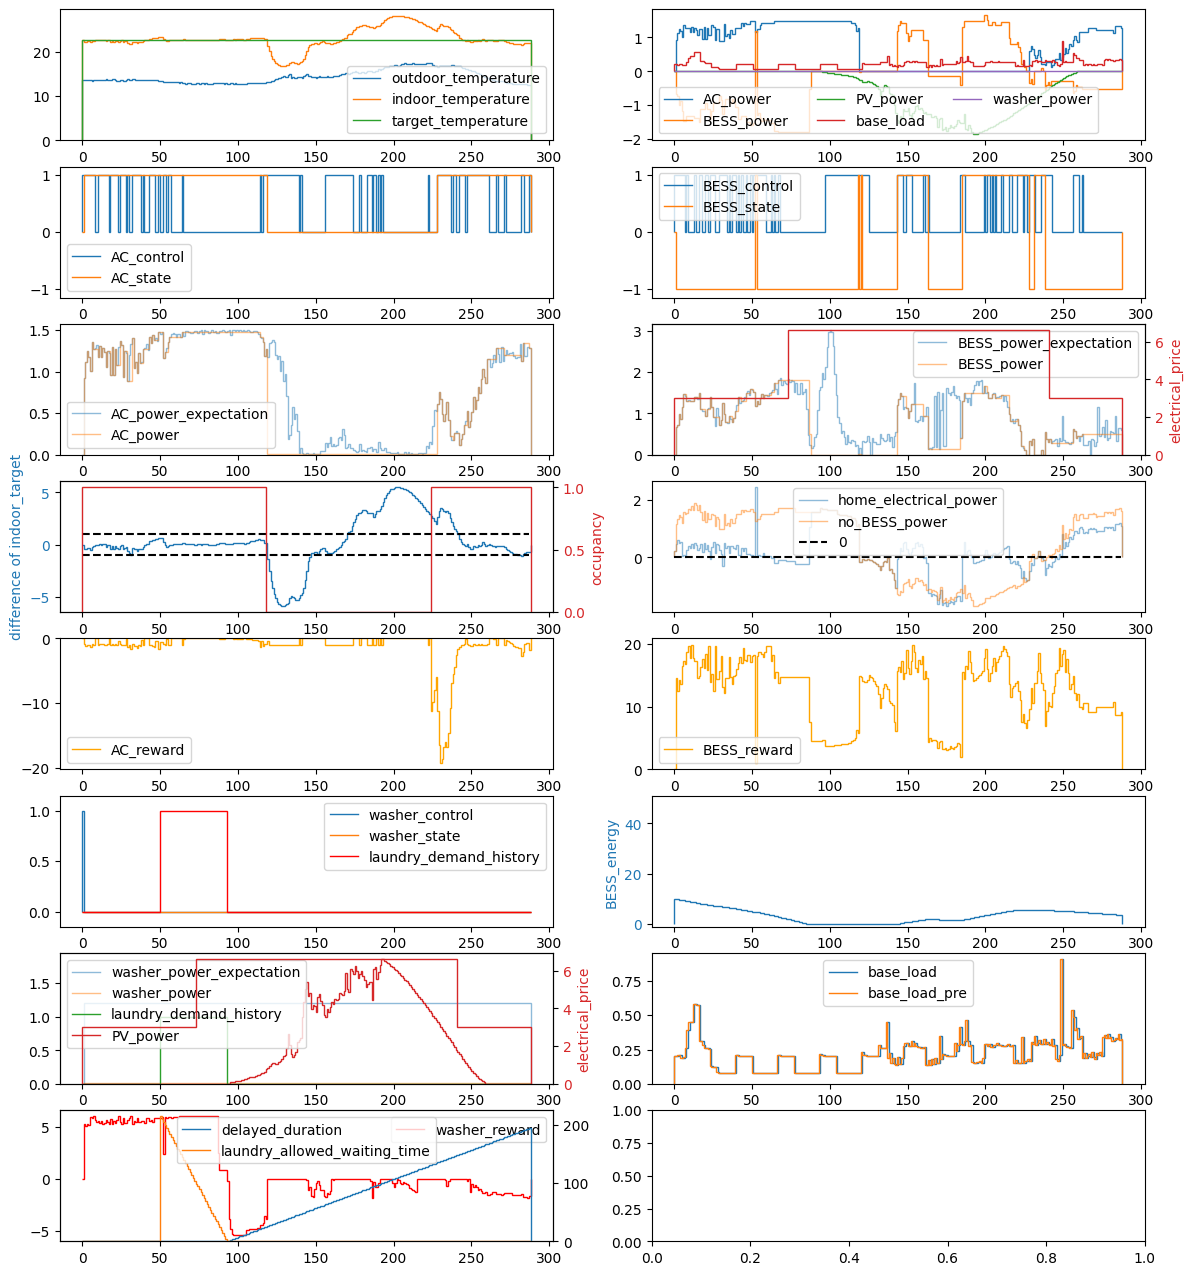

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (2016, 2303)
KPIs:
electrical_consumption_sum: 17.9424
electrical_cost_sum: 86.3283
discomfort_proportion: 0.0938
discomfort_cold_proportion: 0.0139
discomfort_hot_proportion: 0.0799
BESS_electrical_consumption_contribution: 17.9424 / 21.9194, 0.1814
BESS_electrical_cost_contribution: 86.3283 / 92.6075, 0.0678
AC_control: 159 / 288, 0.5521
BESS_control: 182 / 288, 0.6319
washer_control: 11 / 288, 0.0382
AC_reward: -657.1221
BESS_reward: 4092.6124
washer_reward: 1377.3807
washer_delayed_duration: 2.0000000000004547
base_load_pre_mse: 0.0001


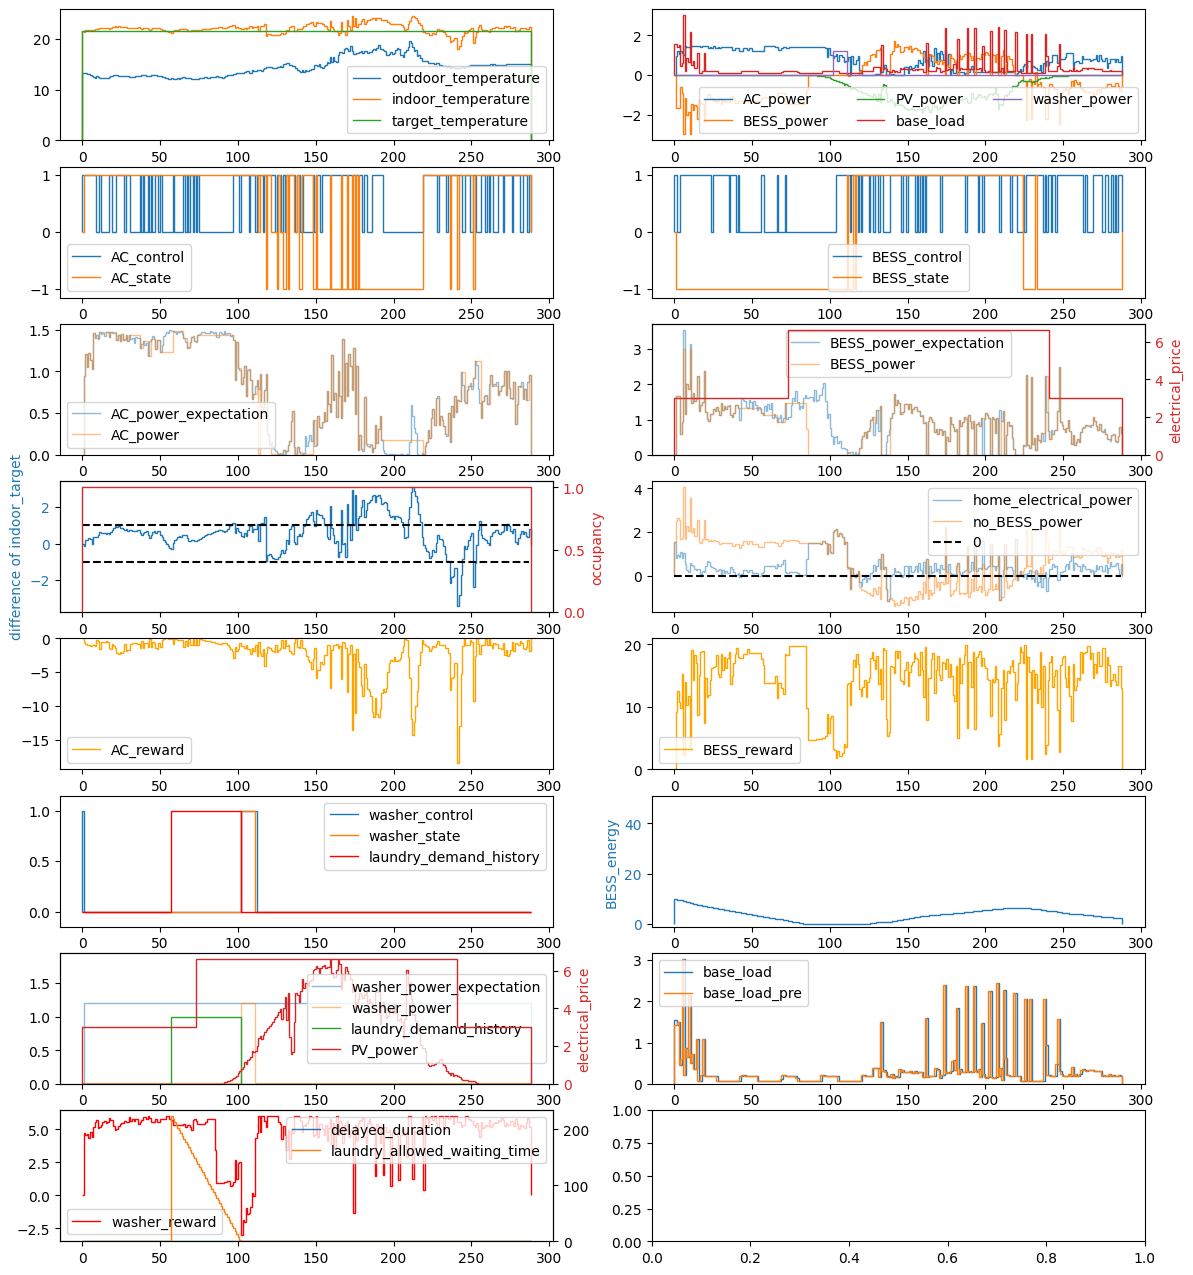

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (2304, 2591)
KPIs:
electrical_consumption_sum: 12.3413
electrical_cost_sum: 58.7075
discomfort_proportion: 0.0000
discomfort_cold_proportion: 0.0000
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 12.3413 / 14.5074, 0.1493
BESS_electrical_cost_contribution: 58.7075 / 57.3972, -0.0228
AC_control: 132 / 288, 0.4583
BESS_control: 192 / 288, 0.6667
washer_control: 10 / 288, 0.0347
AC_reward: -408.0568
BESS_reward: 4607.5935
washer_reward: 1487.1394
washer_delayed_duration: 4.0000000000009095
base_load_pre_mse: 0.0024


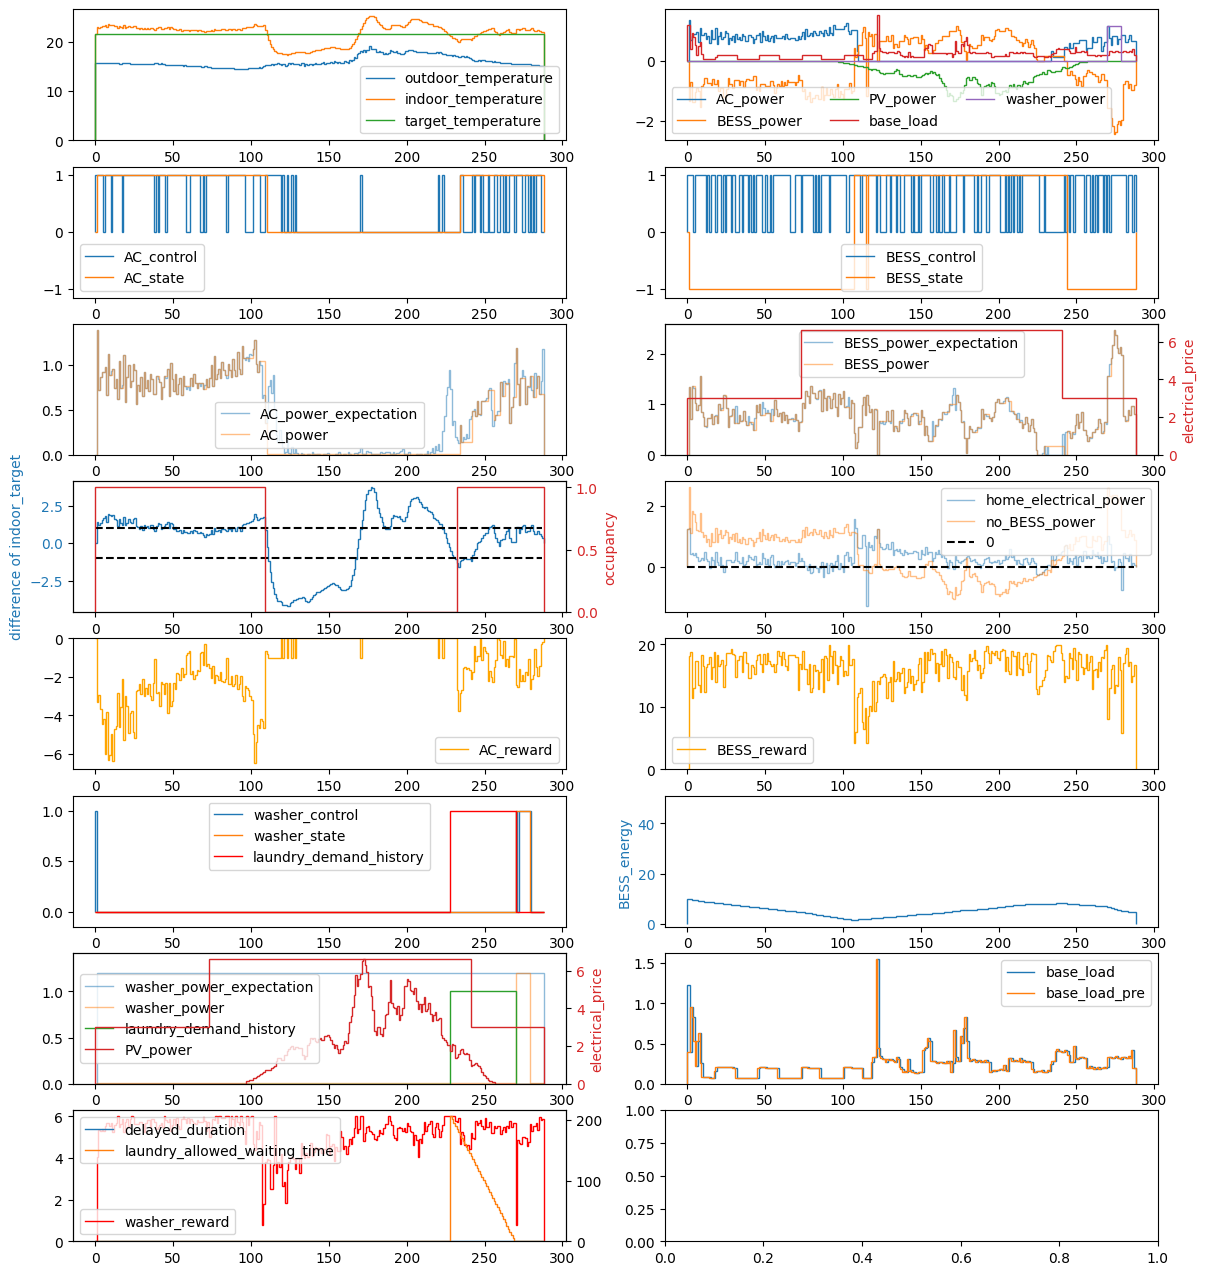

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (2592, 2879)
KPIs:
electrical_consumption_sum: 12.9700
electrical_cost_sum: 56.9413
discomfort_proportion: 0.0121
discomfort_cold_proportion: 0.0121
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 12.9700 / 16.3291, 0.2057
BESS_electrical_cost_contribution: 56.9413 / 66.0542, 0.1380
AC_control: 151 / 288, 0.5243
BESS_control: 201 / 288, 0.6979
washer_control: 10 / 288, 0.0347
AC_reward: -341.8985
BESS_reward: 4392.6099
washer_reward: 1525.5321
washer_delayed_duration: 4.0000000000009095
base_load_pre_mse: 0.0000


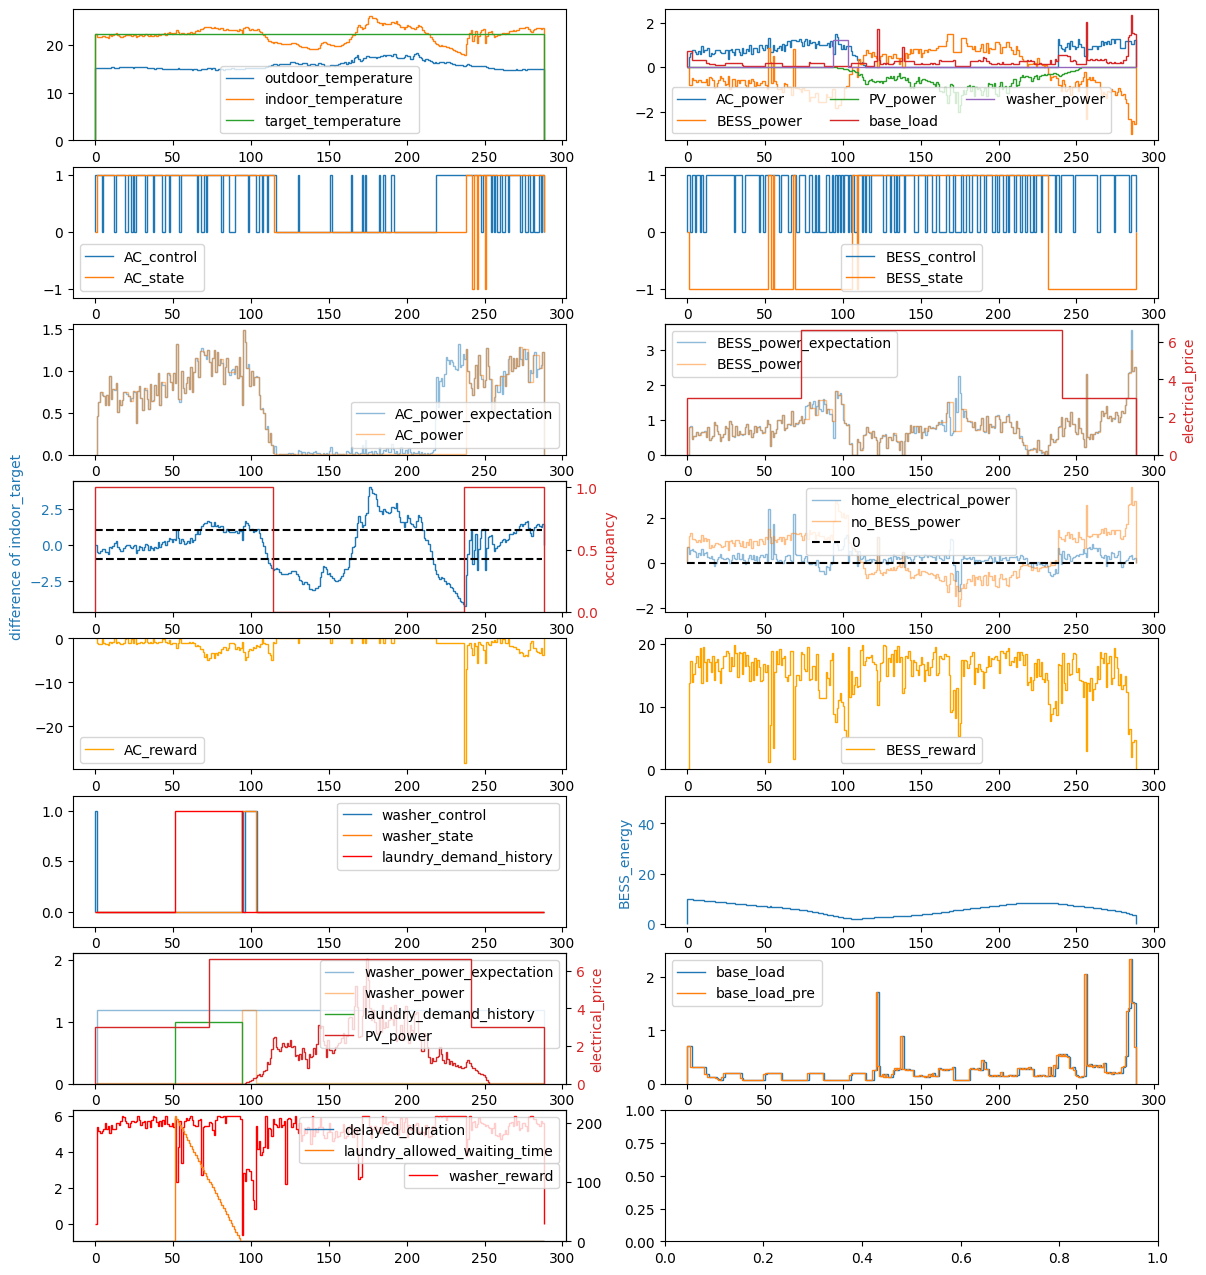

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (2880, 3167)
KPIs:
electrical_consumption_sum: 16.3781
electrical_cost_sum: 81.7031
discomfort_proportion: 0.0938
discomfort_cold_proportion: 0.0938
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 16.3781 / 20.8545, 0.2147
BESS_electrical_cost_contribution: 81.7031 / 84.9436, 0.0381
AC_control: 141 / 288, 0.4896
BESS_control: 110 / 288, 0.3819
washer_control: 11 / 288, 0.0382
AC_reward: -601.3068
BESS_reward: 4134.1212
washer_reward: 1388.0686
washer_delayed_duration: 5.0
base_load_pre_mse: 0.0000


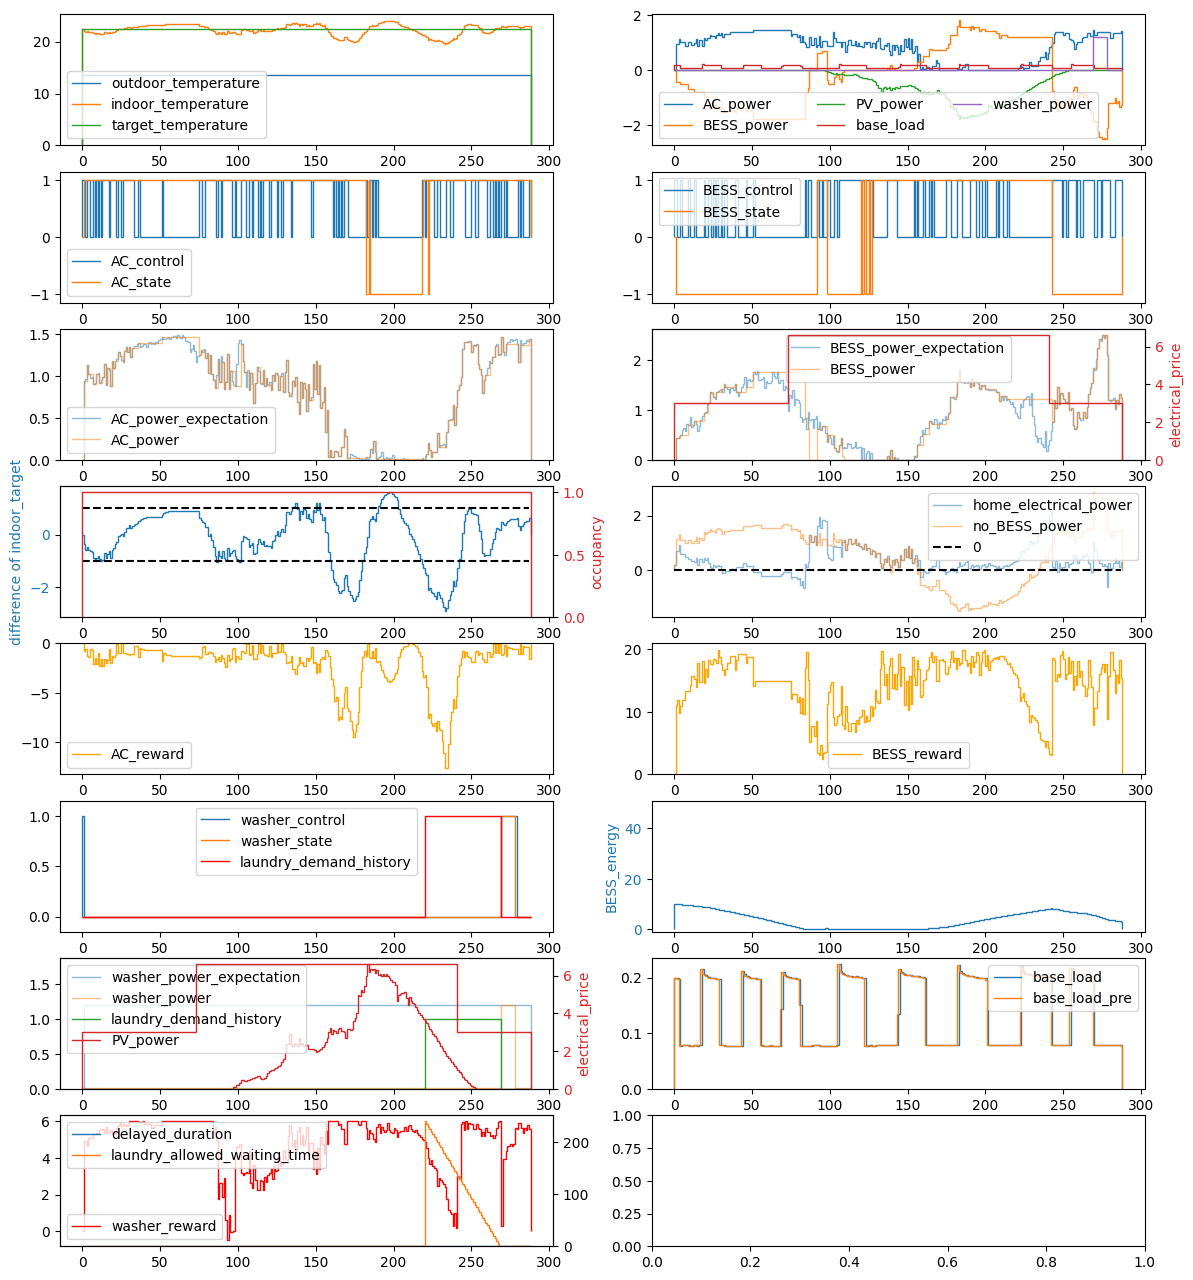

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (3168, 3455)
KPIs:
electrical_consumption_sum: 13.7899
electrical_cost_sum: 70.0476
discomfort_proportion: 0.0176
discomfort_cold_proportion: 0.0176
discomfort_hot_proportion: 0.0000
BESS_electrical_consumption_contribution: 13.7899 / 22.9375, 0.3988
BESS_electrical_cost_contribution: 70.0476 / 88.6018, 0.2094
AC_control: 57 / 288, 0.1979
BESS_control: 179 / 288, 0.6215
washer_control: 11 / 288, 0.0382
AC_reward: -251.1730
BESS_reward: 4274.1188
washer_reward: 1395.3736
washer_delayed_duration: 2.9999999999995453
base_load_pre_mse: 0.0000


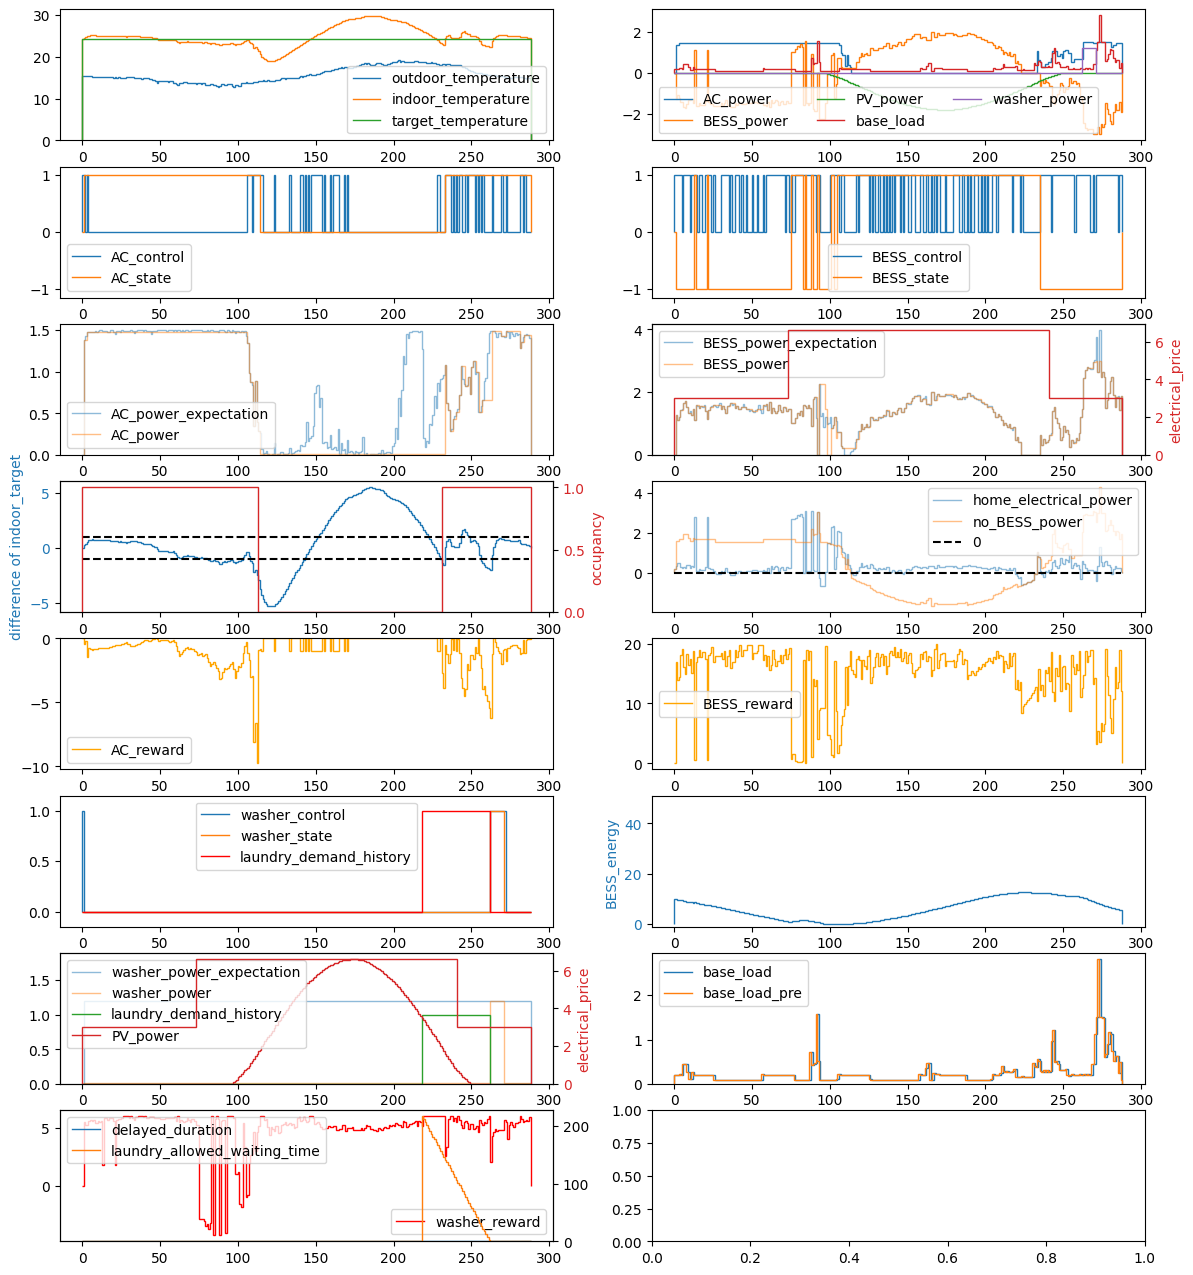

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (3456, 3743)
KPIs:
electrical_consumption_sum: 12.8169
electrical_cost_sum: 61.7417
discomfort_proportion: 0.0529
discomfort_cold_proportion: 0.0000
discomfort_hot_proportion: 0.0529
BESS_electrical_consumption_contribution: 12.8169 / 18.4213, 0.3042
BESS_electrical_cost_contribution: 61.7417 / 71.4584, 0.1360
AC_control: 106 / 288, 0.3681
BESS_control: 198 / 288, 0.6875
washer_control: 10 / 288, 0.0347
AC_reward: -398.1638
BESS_reward: 4517.1982
washer_reward: 1480.7121
washer_delayed_duration: 2.0000000000004547
base_load_pre_mse: 0.0000


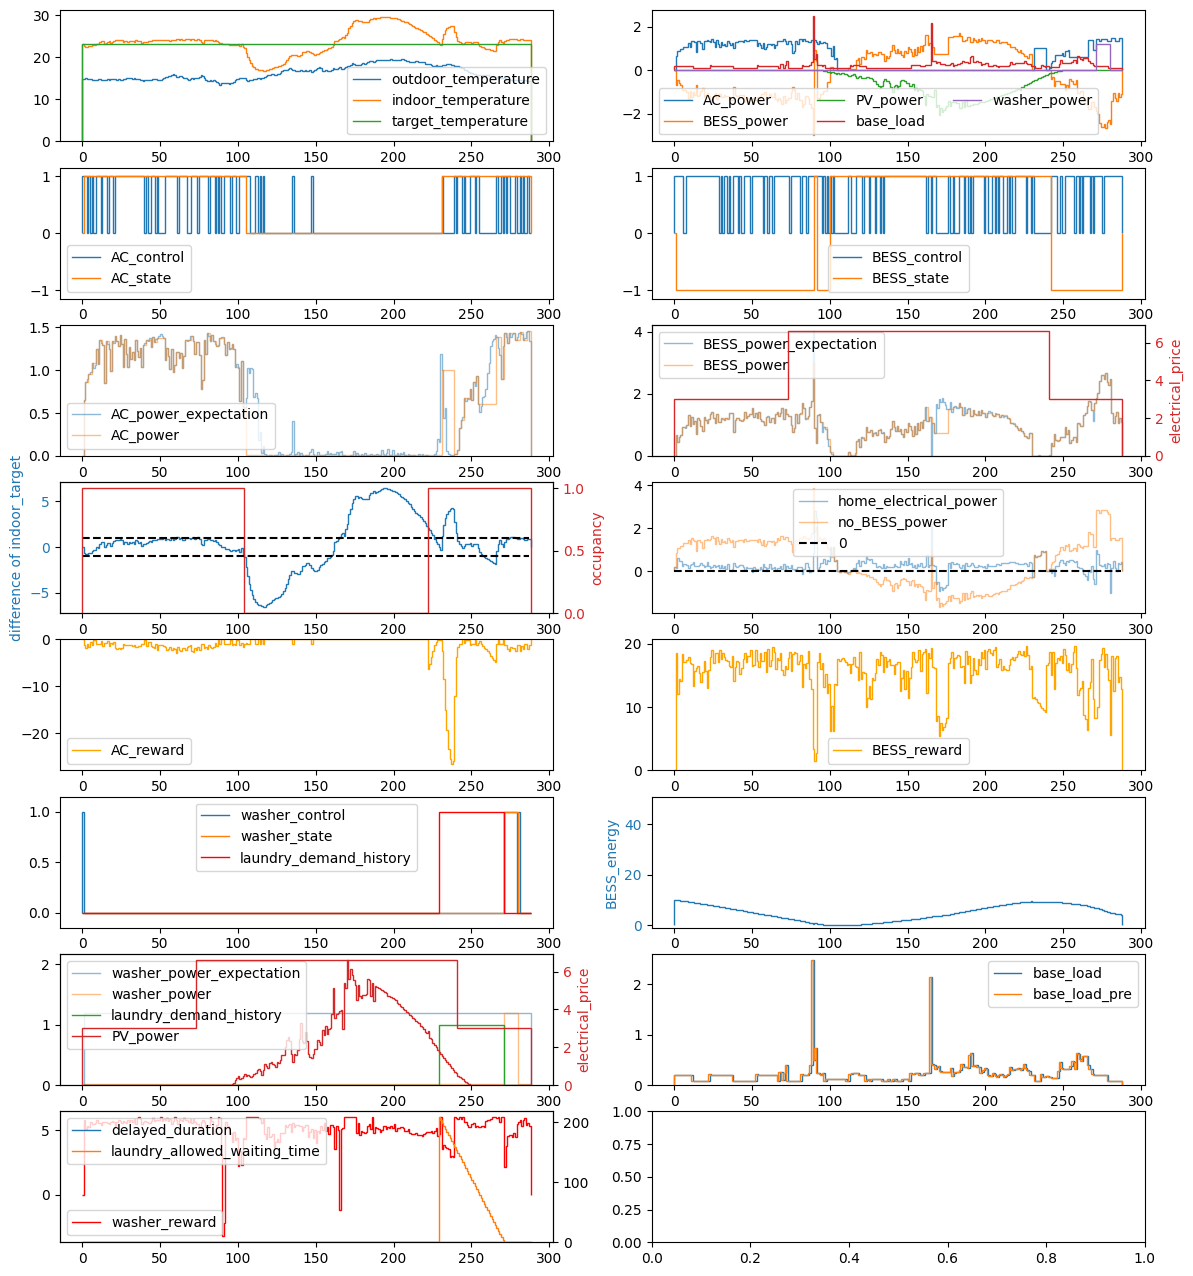

zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
zhaodao
Episode Time: (3744, 4031)
KPIs:
electrical_consumption_sum: 24.0451
electrical_cost_sum: 110.7000
discomfort_proportion: 0.0590
discomfort_cold_proportion: 0.0556
discomfort_hot_proportion: 0.0035
BESS_electrical_consumption_contribution: 24.0451 / 25.9480, 0.0733
BESS_electrical_cost_contribution: 110.7000 / 108.0591, -0.0244
AC_control: 89 / 288, 0.3090
BESS_control: 145 / 288, 0.5035
washer_control: 1 / 288, 0.0035
AC_reward: -540.3370
BESS_reward: 3536.4044
washer_reward: 148.5697
washer_delayed_duration: 86211.00000000009
base_load_pre_mse: 0.0028


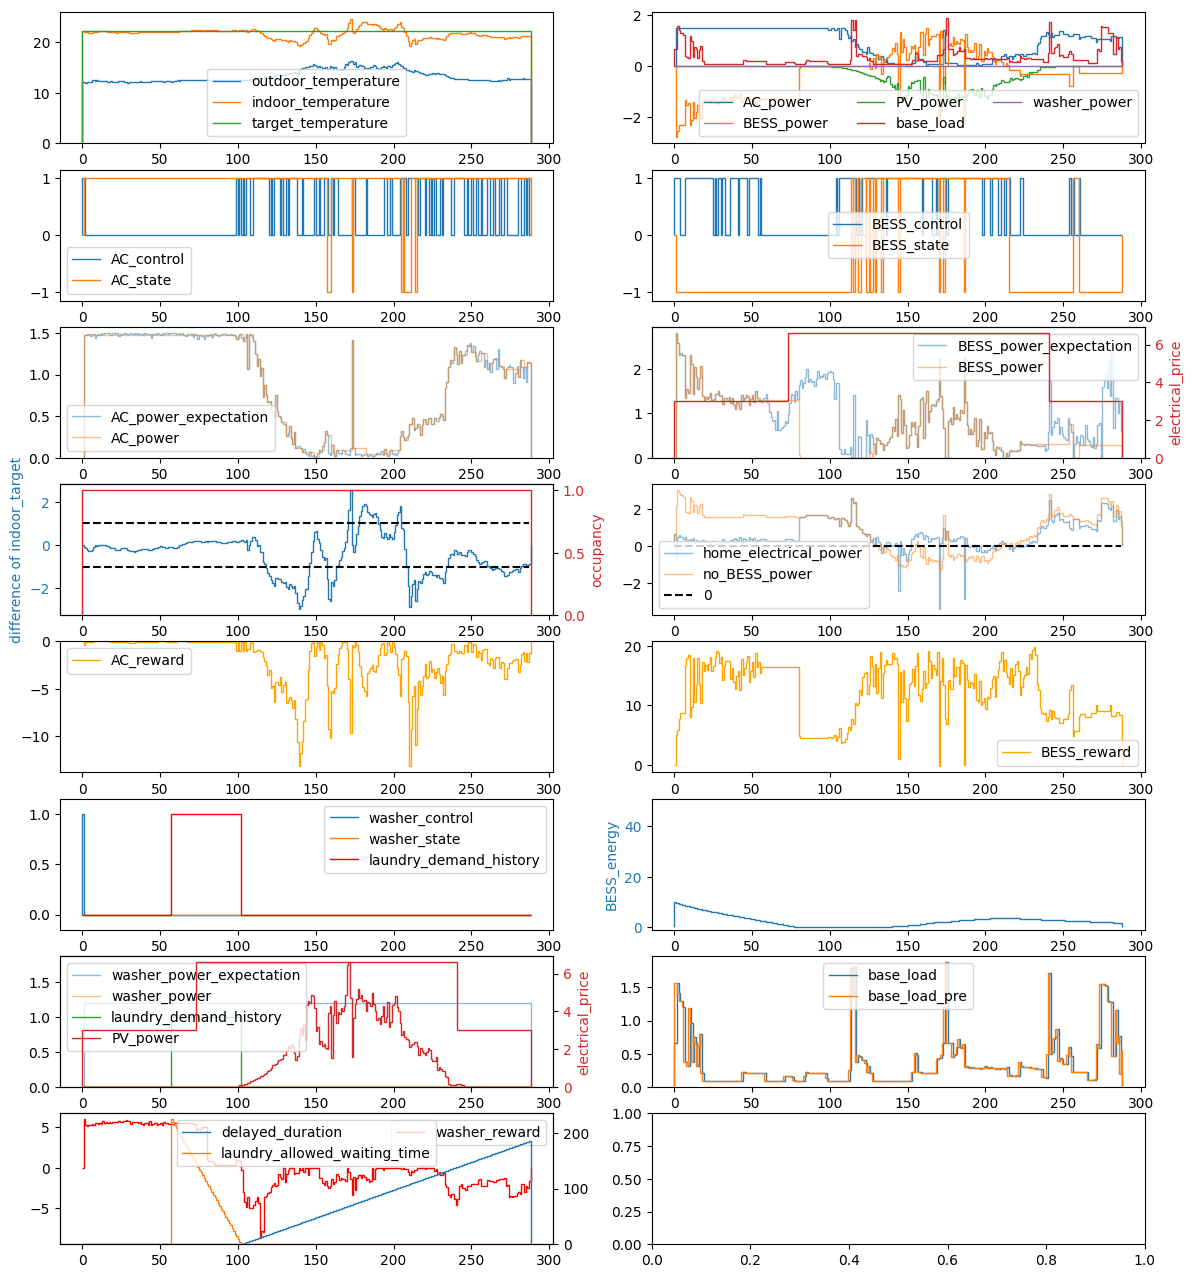

observation_shape: (1, 180), action_shape: (1, 16)


In [5]:
num_episodes = 14
if env.metadata['multi_agent']:
    renderer = Renderer(render_mode='episode', env=env.par_env.unwrapped)
    et.pz_simulation_process(env, renderer, model, num_episodes=num_episodes)
else:
    renderer = Renderer(render_mode='episode', env=env.envs[0].unwrapped)
    et.gym_simulation_process(env, renderer, model, num_episodes=num_episodes)